In [1]:
from nomad.client import query_archive
import matplotlib.pyplot as plt

In [2]:
run = query_archive()[1]
dos = run.section_single_configuration_calculation[0].section_dos[0]

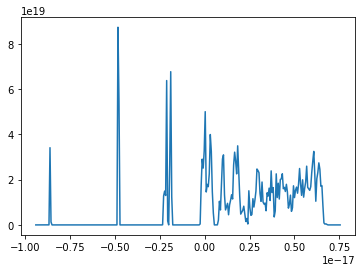

In [3]:
plt.plot(dos.dos_energies.m, dos.dos_values[0])

In [4]:
run.section_system[0].chemical_composition_bulk_reduced

'O3SrTi'